<a href="https://colab.research.google.com/github/algsn/DAA/blob/main/DAA_P9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
adjacency_matrix = np.array([[0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 1, 0, 1],
                              [1, 0, 1, 0]])
damping_factor = 0.85

num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

num_iteration = 100

In [2]:
#number of iterations
num_iteration = 100

for i in range(num_iteration):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        #calculate the PageRank contributor from each linking page
        linking_page = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_page:
            new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank
#print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

PR(Page 1) = 0.122
PR(Page 2) = 0.302
PR(Page 3) = 0.378
PR(Page 4) = 0.198


In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adjacency_matrix = np.array([[0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 1, 0, 1],
                              [1, 0, 1, 0]])
G = nx.DiGraph()

num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

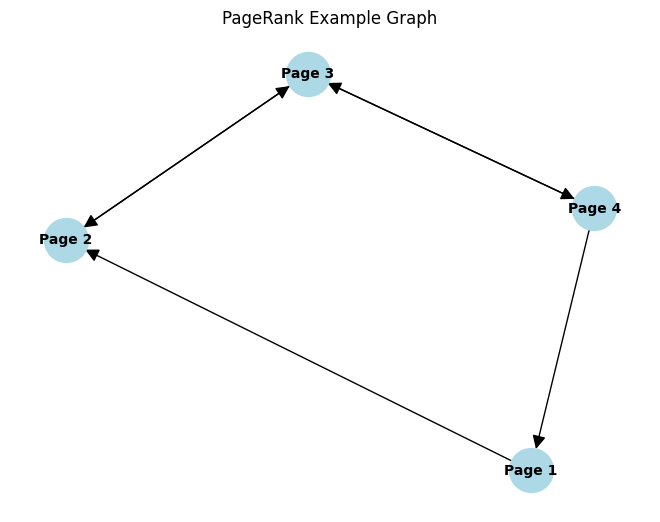

In [4]:
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

In [5]:
#Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0, 1],
                             [1, 0, 1, 1, 1],
                             [0, 1, 0, 1, 0],
                             [1, 1, 1, 0, 1],
                             [1, 1, 0, 1, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

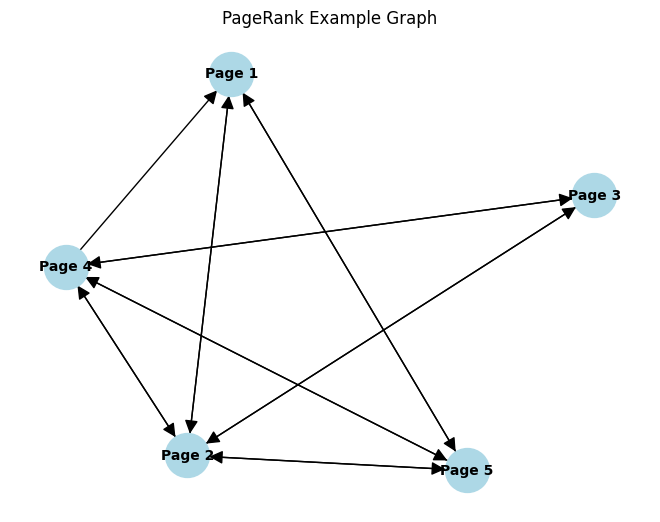

In [6]:
# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

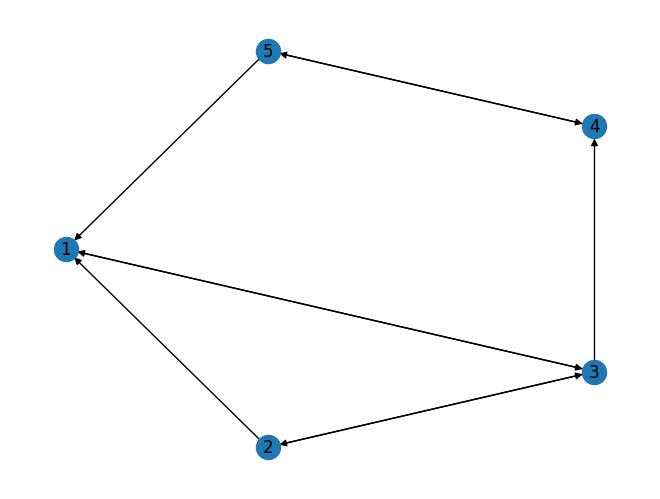

In [7]:
#Study Kasus 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()


In [8]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards  = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [9]:
import numpy as np

#matrix adjancecy (0 berarti tidk ada tautan, 1 berarti ada tautan)
adjacency_matrix=np.array([[0, 1, 1, 1, 0],
                          [0, 0, 1, 0, 0],
                          [1, 0, 0, 0, 0],
                          [0, 0, 1, 0, 1],
                          [0, 0, 1, 1, 0]])

#inisialisasi nilai awal page rank
pagerank=np.array([1, 1, 1, 1, 1], dtype=float)

#faktor damping
damping_factor=0.85
#sjumlah iterasi
num_iterations=100


In [10]:
for _ in range(num_iterations):

    new_pagerank = np.zeros(pagerank.shape, dtype=float)

    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            num_outlinks = np.sum(adjacency_matrix[i, :])
            if num_outlinks > 0:
                new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

    new_pagerank += (1 - damping_factor) / len(pagerank)
    pagerank = new_pagerank

print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [11]:
import numpy as np

num_pages = 5
outlinks = np.array([3, 2, 1, 2, 2])
inlinks = np.array([1, 2, 1, 2, 1])
pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

In [12]:
for _ in range(num_iterations):

    new_pagerank = np.zeros(num_pages, dtype=float)

    for i in range(num_pages):
        for j in range(num_pages):
            if i != j and outlinks[j] > 0:
                new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

    pagerank = (1 - damping_factor) / num_pages + new_pagerank

print("Hasil Pagerank:")
for i, pr in enumerate(pagerank):
    print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil Pagerank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


Latihan P 9

In [13]:
#untuk menghitung page rank
import numpy as np
def PAGE_RANK(matriks):
    #define the adjaceny matrix
    adjacency_matrix = np.array(matriks)

    #Set the damping factor
    damping_factor = 0.85

    #initialize the page rank value

    num_pages = len(adjacency_matrix)
    page_rank = np.ones(num_pages) / num_pages

    #Number of iterations
    num_iterations = 100

    for i in range(num_iterations):
        new_page_rank = np.zeros(num_pages)
        for j in range(num_pages):
            #calculate the Pagerank contribution from each linking page
            linking_pages = [k for k in range(num_pages) if adjacency_matrix[k,j]==1]
            for linking_page in linking_pages:
                new_page_rank[j] += page_rank[linking_page]/sum(adjacency_matrix[linking_page, :])
            new_page_rank[j]=damping_factor * new_page_rank[j] + (1 - damping_factor)/ num_pages
        page_rank = new_page_rank

    #print the final Pagerank values
    for page, rank in enumerate(page_rank):
        print(f"PR(page {page+1})={rank:.3f}")

In [14]:
#untuk membuat grafik
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def Gambar (matriks):
    adjacency_matrix = np.array(matriks)

    #create a directed graph
    G = nx.DiGraph()

    #add nodes
    num_pages = len(adjacency_matrix)
    G.add_nodes_from(range(num_pages))

    #add edges based on the adjaceny matrix
    for i in range(num_pages):
        for j in range(num_pages):
            if adjacency_matrix[i, j] == 1:
                G.add_edge(i, j)

    #Draw the graph
    pos = nx.spring_layout(G) #Layout the graph
    labels = {i: f"Page{i+1}"for i in range(num_pages)}
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
    plt.title("PageRank Example Graph")
    plt.show()

PR(page 1)=0.025
PR(page 2)=0.046
PR(page 3)=0.064
PR(page 4)=0.080
PR(page 5)=0.093
PR(page 6)=0.104


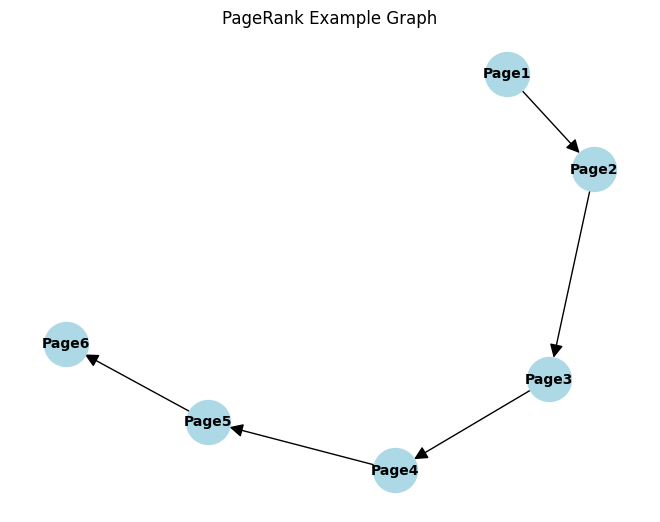

In [26]:
# nO 1
import numpy as np
matriks = np.array([[0,1,0,0,0,0],
                  [0,0,1,0,0,0],
                  [0,0,0,1,0,0],
                  [0,0,0,0,1,0],
                  [0,0,0,0,0,1],
                  [0,0,0,0,0,0]])
PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.200
PR(page 2)=0.200
PR(page 3)=0.200
PR(page 4)=0.200
PR(page 5)=0.200


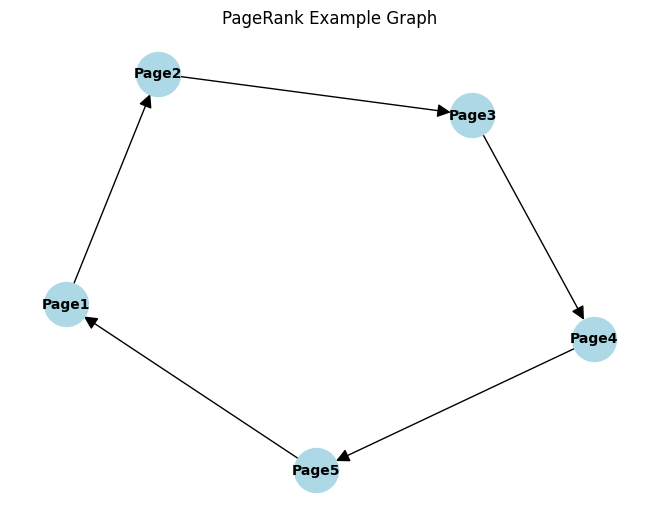

In [27]:
# NO 2
import numpy as np
adjacency_matrix = np.array([[0,1,0,0,0],
                            [0,0,1,0,0],
                            [0,0,0,1,0],
                            [0,0,0,0,1],
                            [1,0,0,0,0]])

PAGE_RANK(adjacency_matrix)
Gambar(adjacency_matrix)

PR(page 1)=0.175
PR(page 2)=0.325
PR(page 3)=0.325
PR(page 4)=0.175


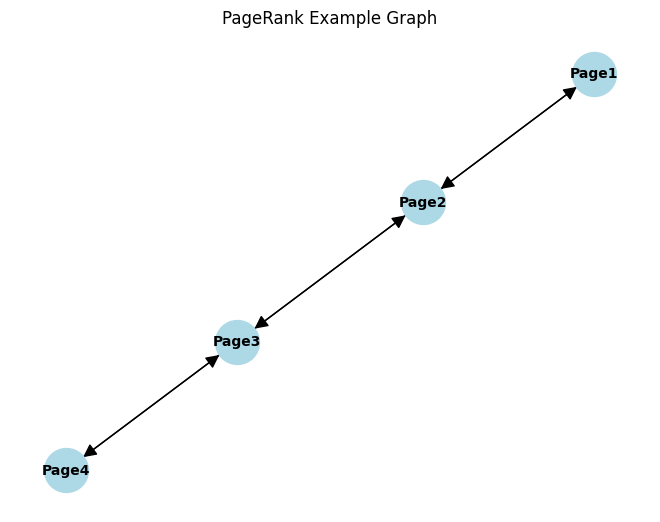

In [28]:
# NO 3
import numpy as np
matriks = ([[0,1,0,0],
            [1,0,1,0],
            [0,1,0,1],
            [0,0,1,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.167
PR(page 2)=0.167
PR(page 3)=0.167
PR(page 4)=0.167
PR(page 5)=0.167
PR(page 6)=0.167


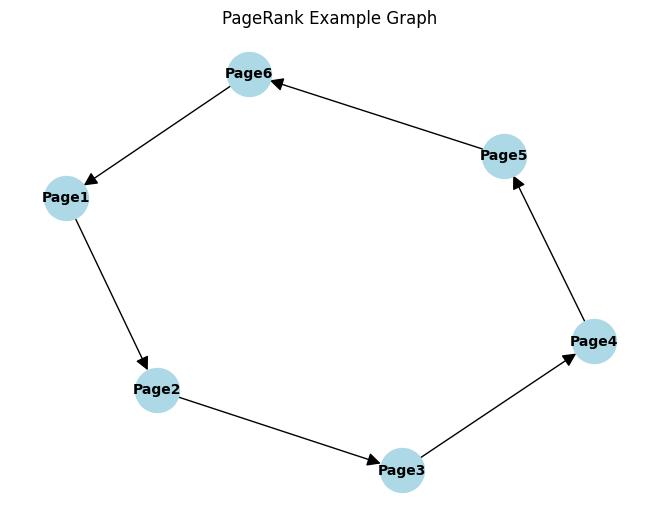

In [32]:
# NO 4
import numpy as np
matriks = np.array([[0,1,0,0,0,0],
                    [0,0,1,0,0,0],
                    [0,0,0,1,0,0],
                    [0,0,0,0,1,0],
                    [0,0,0,0,0,1],
                    [1,0,0,0,0,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.250
PR(page 2)=0.356
PR(page 3)=0.250
PR(page 4)=0.144


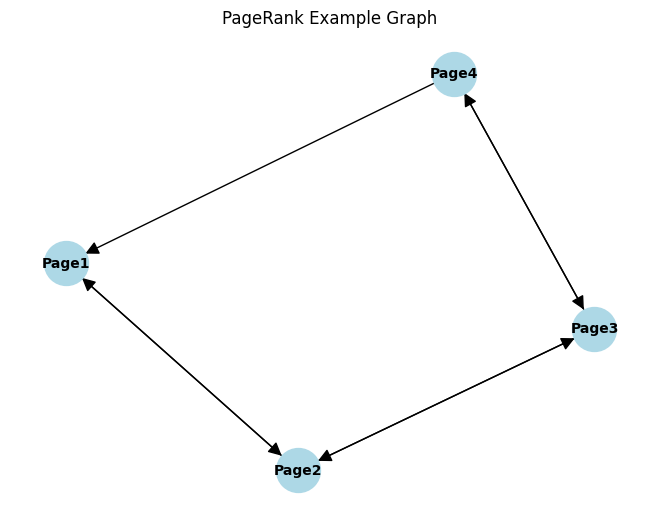

In [31]:
# NO 5
import numpy as np
matriks = np.array([[0,1,0,0],
                    [1,0,1,0],
                    [0,1,0,1],
                    [1,0,1,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.225
PR(page 2)=0.221
PR(page 3)=0.218
PR(page 4)=0.215
PR(page 5)=0.121


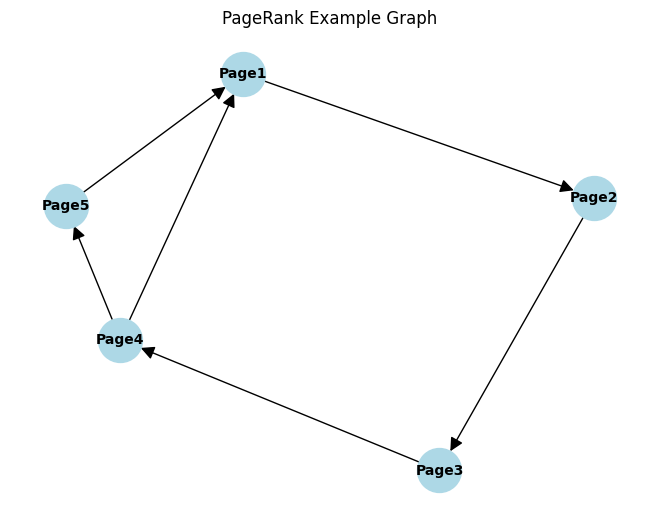

In [40]:
# NO 6
import numpy as np

matriks = np.array([[0,1,0,0,0],
                    [0,0,1,0,0],
                    [0,0,0,1,0],
                    [1,0,0,0,1],
                    [1,0,0,0,0]])

PAGE_RANK(matriks)
Gambar(matriks)

PR(page 1)=0.205
PR(page 2)=0.295
PR(page 3)=0.205
PR(page 4)=0.295


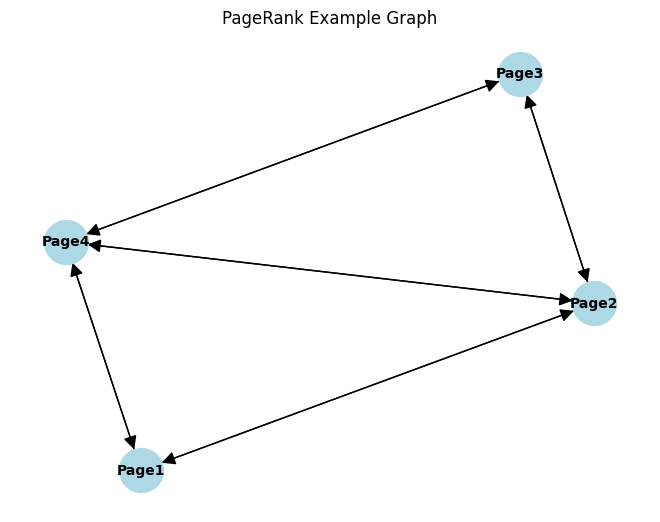

In [42]:
# NO 7
import numpy as np

matriks = np.array([[0,1,0,1],
                    [1,0,1,1],
                    [0,1,0,1],
                    [1,1,1,0]])

PAGE_RANK(matriks)
Gambar(matriks)

 Analisa Penerapan Algoritma Page Rank Dalam Permasalahan Kehidupan Manusia:

 Dalam berbisnis Perusahaan dapat menggunakan PageRank untuk menganalisis jaringan bisnis mereka.
 Pelanggan, mitra, atau pemasok dapat dianggap sebagai “halaman” dalam jaringan bisnis, dan kolaborasi, kontrak, atau transaksi bisnis dapat dianggap sebagai “hubungan” antara pihak-pihak tersebut.
 PageRank dapat membantu mengidentifikasi hubungan bisnis  paling penting yang dapat berdampak pada kesuksesan perusahaan.

